<div class="alert alert-block alert-warning">
<h1> <font size="5" color='green'> Importing required libraries </font> </h1> </div>

In [43]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as mtp
from sklearn.linear_model import LinearRegression
from sklearn.metrics import plot_confusion_matrix, accuracy_score
import warnings

<div class="alert alert-block alert-warning">
<h1> <font size="5" color='green'> Loading dataset </font> </h1> </div>

In [2]:
#loading training dataset
train_df=pd.read_csv('AMZNtrain.csv')

In [3]:
#loading test dataset
test_df=pd.read_csv('AMZNtest.csv')

<div class="alert alert-block alert-warning">
<h1> <font size="5" color='green'> Data Exploration </font> </h1> </div>

In [4]:
train_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [5]:
test_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,1465.199951,1553.359985,1460.930054,1539.130005,1539.130005,7983100
1,2019-01-03,1520.010010,1538.000000,1497.109985,1500.280029,1500.280029,6975600
2,2019-01-04,1530.000000,1594.000000,1518.310059,1575.390015,1575.390015,9182600
3,2019-01-07,1602.310059,1634.560059,1589.189941,1629.510010,1629.510010,7993200
4,2019-01-08,1664.689941,1676.609985,1616.609985,1656.579956,1656.579956,8881400


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       21 non-null     object 
 1   Open       21 non-null     float64
 2   High       21 non-null     float64
 3   Low        21 non-null     float64
 4   Close      21 non-null     float64
 5   Adj Close  21 non-null     float64
 6   Volume     21 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.3+ KB


In [8]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,1258.0,8.238401e+02,4.779314e+02,2.844000e+02,3.938925e+02,7.264500e+02,1.005860e+03,2.038110e+03
High,1258.0,8.317626e+02,4.828513e+02,2.904200e+02,3.987950e+02,7.297800e+02,1.009742e+03,2.050500e+03
Low,1258.0,8.141739e+02,4.710582e+02,2.840000e+02,3.884275e+02,7.200800e+02,9.971225e+02,2.013000e+03
Close,1258.0,8.232565e+02,4.769527e+02,2.869500e+02,3.947725e+02,7.271900e+02,1.002762e+03,2.039510e+03
Adj Close,1258.0,8.232565e+02,4.769527e+02,2.869500e+02,3.947725e+02,7.271900e+02,1.002762e+03,2.039510e+03
Volume,1258.0,4.231814e+06,2.400533e+06,1.093000e+06,2.713950e+06,3.582300e+06,4.857900e+06,2.385610e+07


In [9]:
test_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,21.0,1.632345e+03,6.061769e+01,1.465200e+03,1.623000e+03,1.641070e+03,1.670500e+03,1.712000e+03
High,21.0,1.657304e+03,4.836193e+01,1.538000e+03,1.645000e+03,1.663250e+03,1.681870e+03,1.736410e+03
Low,21.0,1.612697e+03,5.912859e+01,1.460930e+03,1.595150e+03,1.619680e+03,1.641400e+03,1.691540e+03
Close,21.0,1.640032e+03,5.243674e+01,1.500280e+03,1.629510e+03,1.654930e+03,1.670570e+03,1.718730e+03
Adj Close,21.0,1.640032e+03,5.243674e+01,1.500280e+03,1.629510e+03,1.654930e+03,1.670570e+03,1.718730e+03
Volume,21.0,6.381033e+06,1.769181e+06,4.089900e+06,4.945900e+06,6.020500e+06,6.975600e+06,1.091030e+07


<div class="alert alert-block alert-warning">
<h1> <font size="5" color='green'>Data cleaning </font> </h1> </div>

<div><font color='blue'><h3>Checking for missing values in training dataset</h3></font></div>

In [10]:
train_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<div><font color='blue'><h3>visualizing missing values in training dataset using heatmap</h3></font></div>

<AxesSubplot:>

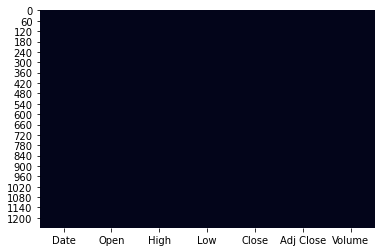

In [11]:
sbn.heatmap(train_df.isnull(), cbar=False)

<div><font color='blue'><h3>Checking for missing values in test dataset</h3></font></div>


In [12]:
test_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<div><font color='blue'><h3>visualizing missing values in test dataset using heatmap</h3></font></div>

<AxesSubplot:>

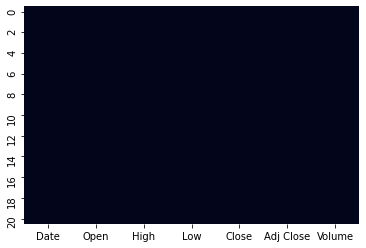

In [13]:
sbn.heatmap(test_df.isnull(), cbar=False)

From the result of isnull().sum() and heatmap, it is clear that both training and test datasets has no missing values

<div><font color='blue'><h3>dropping duplicated data in train dataset</h3></font></div>

In [14]:
train_df.drop_duplicates()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500
...,...,...,...,...,...,...,...
1253,2018-12-24,1346.000000,1396.030029,1307.000000,1343.959961,1343.959961,7220000
1254,2018-12-26,1368.890015,1473.160034,1363.010010,1470.900024,1470.900024,10411800
1255,2018-12-27,1454.199951,1469.000000,1390.310059,1461.640015,1461.640015,9722000
1256,2018-12-28,1473.349976,1513.469971,1449.000000,1478.020020,1478.020020,8829000


<div><font color='blue'><h3>dropping duplicated values in test dataset</h3></font></div>

In [15]:
test_df.drop_duplicates()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,1465.199951,1553.359985,1460.930054,1539.130005,1539.130005,7983100
1,2019-01-03,1520.010010,1538.000000,1497.109985,1500.280029,1500.280029,6975600
2,2019-01-04,1530.000000,1594.000000,1518.310059,1575.390015,1575.390015,9182600
3,2019-01-07,1602.310059,1634.560059,1589.189941,1629.510010,1629.510010,7993200
4,2019-01-08,1664.689941,1676.609985,1616.609985,1656.579956,1656.579956,8881400
5,2019-01-09,1652.979980,1667.800049,1641.400024,1659.420044,1659.420044,6348800
6,2019-01-10,1641.010010,1663.250000,1621.619995,1656.219971,1656.219971,6507700
7,2019-01-11,1640.550049,1660.290039,1636.219971,1640.560059,1640.560059,4686200
8,2019-01-14,1615.000000,1648.199951,1595.150024,1617.209961,1617.209961,6005900
9,2019-01-15,1632.000000,1675.160034,1626.010010,1674.560059,1674.560059,5998500


<div class="alert alert-block alert-warning">
<h1> <font size="5" color='green'>Data correlation </font> </h1> </div>

In [16]:
train_df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999803,0.999632,0.999441,0.999441,0.205723
High,0.999803,1.000000,0.999557,0.999701,0.999701,0.211893
Low,0.999632,0.999557,1.000000,0.999758,0.999758,0.193306
Close,0.999441,0.999701,0.999758,1.000000,1.000000,0.201353
Adj Close,0.999441,0.999701,0.999758,1.000000,1.000000,0.201353
Volume,0.205723,0.211893,0.193306,0.201353,0.201353,1.000000


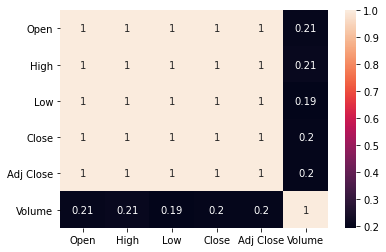

In [17]:
ax = sbn.heatmap(train_df.corr(), annot=True)

In [18]:
test_df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.936397,0.956102,0.875443,0.875443,-0.263345
High,0.936397,1.000000,0.953721,0.970392,0.970392,-0.089933
Low,0.956102,0.953721,1.000000,0.940793,0.940793,-0.283482
Close,0.875443,0.970392,0.940793,1.000000,1.000000,-0.106658
Adj Close,0.875443,0.970392,0.940793,1.000000,1.000000,-0.106658
Volume,-0.263345,-0.089933,-0.283482,-0.106658,-0.106658,1.000000


<AxesSubplot:xlabel='Volume', ylabel='High'>

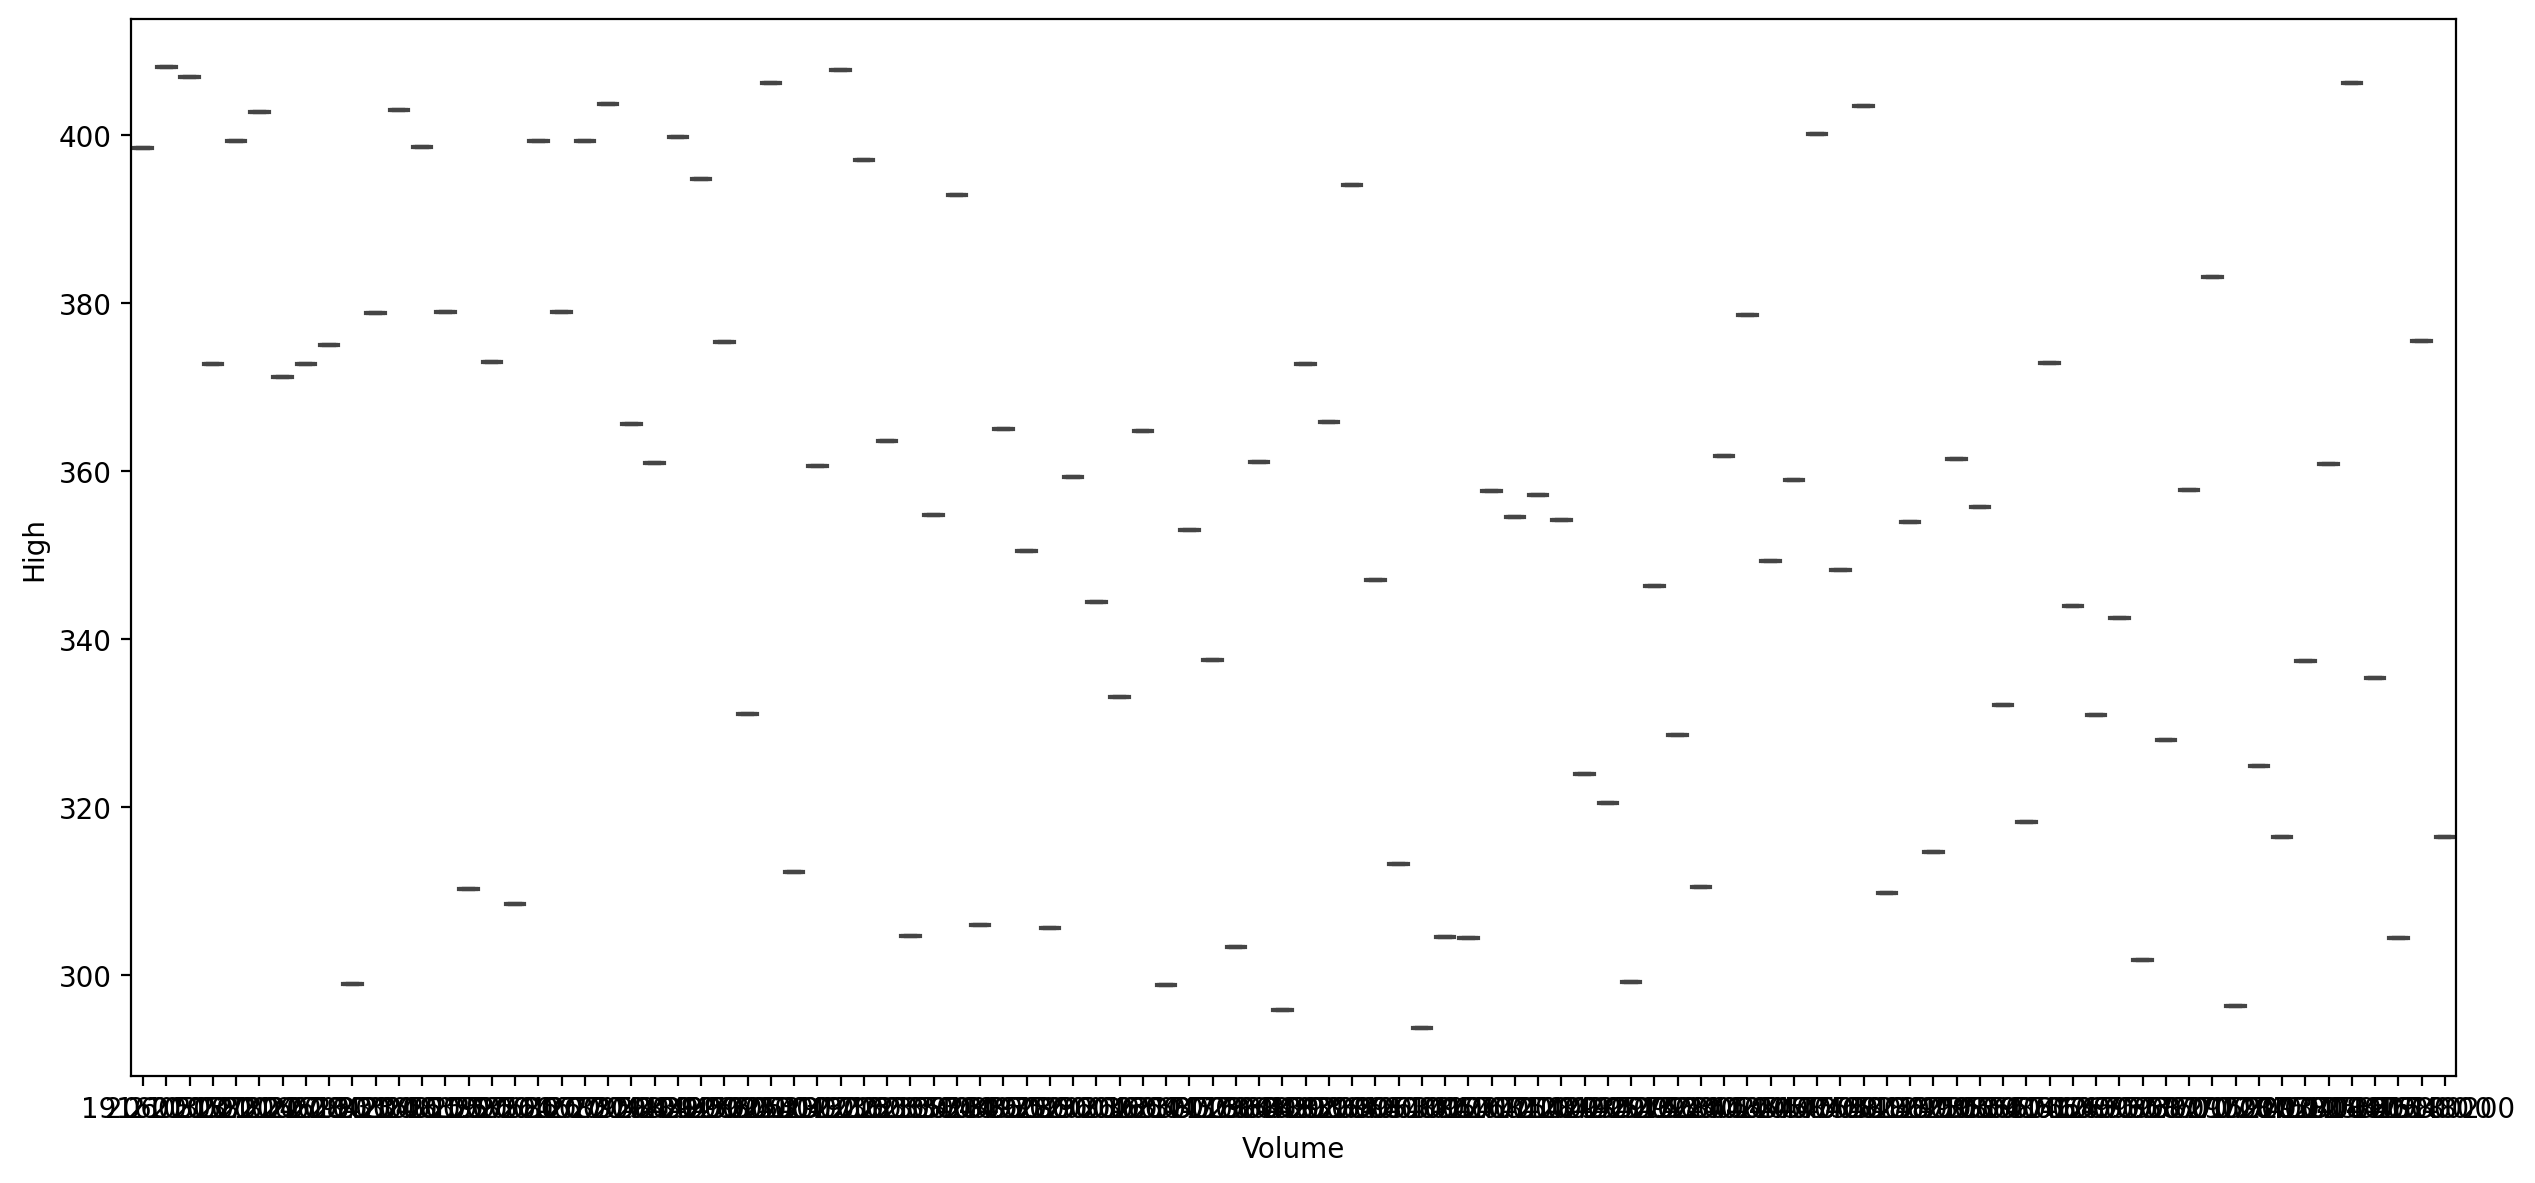

In [52]:
#visualizing the correlation between Open and the Volume value using boxplot
mtp.figure(figsize = (15,7), dpi = 200)
sbn.boxplot(data = train_df.iloc[:100], y ='High', x = 'Volume')

<Figure size 2400x1200 with 0 Axes>

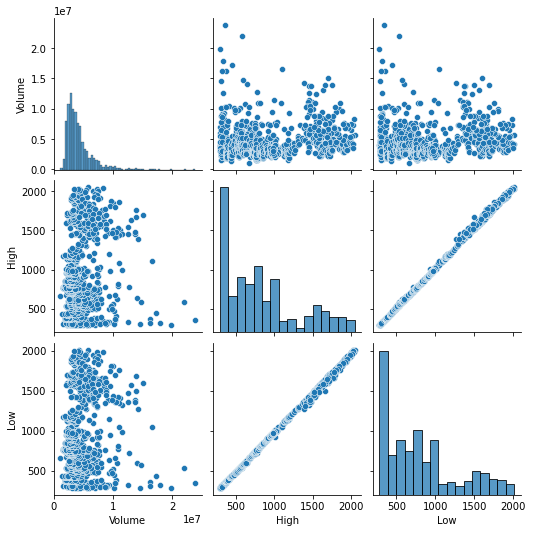

In [21]:
mtp.figure(figsize = (12,6), dpi = 200)
sbn.pairplot(data = train_df[['Volume', 'High', "Low"]])

<AxesSubplot:xlabel='Volume', ylabel='Open'>

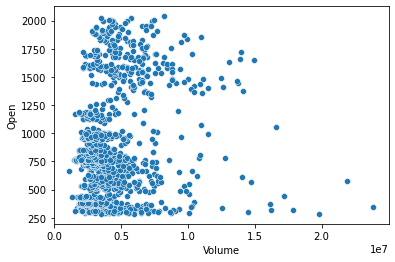

In [44]:

warnings.filterwarnings("ignore")
sbn.scatterplot(train_df['Volume'],train_df['Open'])

<div class="alert alert-block alert-warning">
<h1> <font size="5" color='green'>Extracting dependent and independent variables </font> </h1> </div>

In [22]:
x_train=train_df[['Open','High','Low','Close','Adj Close']]

In [23]:
y_train=train_df['Volume']

In [24]:
x_test=test_df[['Open','High','Low','Close','Adj Close']]

In [25]:
y_test=test_df['Volume']

<div class="alert alert-block alert-warning">
<h1> <font size="5" color='green'>Train Regression model </font> </h1> </div>

In [29]:
#Fitting the MLR model to the training set:    
regressor= LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression()

<div class="alert alert-block alert-warning">
<h1> <font size="5" color='green'>Make predictions </font> </h1> </div>

In [30]:
y_pred= regressor.predict(x_test) 
y_pred

array([11484205.736302  ,  5793446.50206797,  9504790.58061082,
        5915809.0411094 ,  7095008.25938047,  3827945.42452565,
        5382320.82387958,  3821794.90218632,  6930401.82691427,
        6327558.84557762,  4262712.78948591,  3487342.31871815,
        3551915.26742753,  8359923.54693164,  5549750.03920001,
        3710465.04105448,  3394609.42333916,  4072999.40417748,
        5463877.52336994,  7329244.52591528,  7204951.73250593])

<div class="alert alert-block alert-warning">
<h1> <font size="5" color='green'>Evaluating Model performance </font> </h1> </div>

In [32]:
print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test)) 


Train Score:  0.4321232449829284
Test Score:  -0.04575507258638378


<div class="alert alert-block alert-warning">
<h1> <font size="5" color='green'>Residual plots </font> </h1> </div>

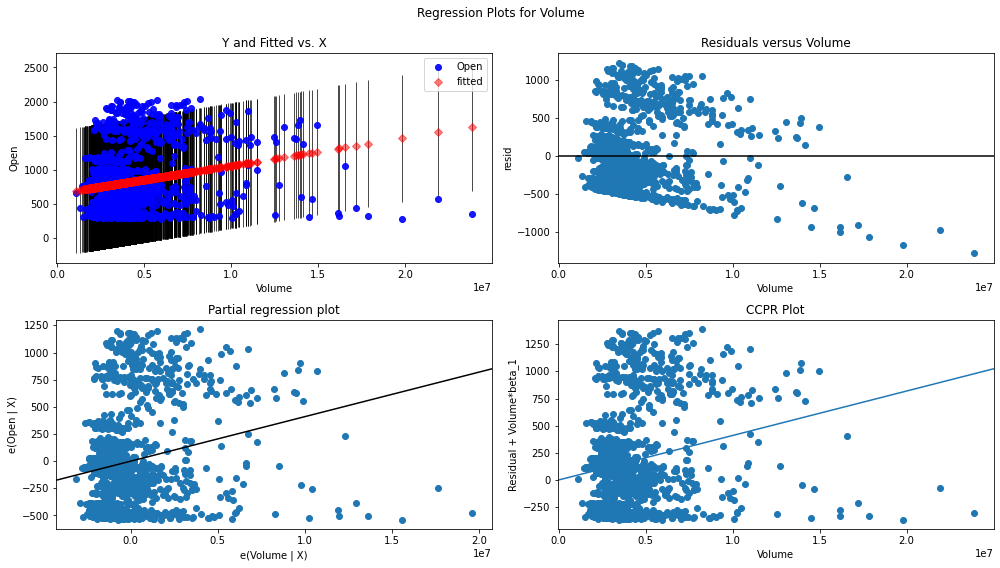

In [39]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

linear_model = ols('Open ~ Volume',data=train_df).fit()
fig = mtp.figure(figsize=(14, 8))

fig = sm.graphics.plot_regress_exog(linear_model,
                                    'Volume',
                                    fig=fig)